## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Importing dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

[1]


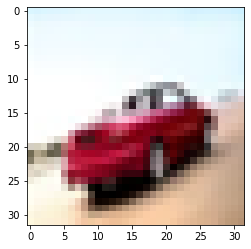

In [3]:
ran = np.random.randint(0, X_train.shape[0])
print(Y_train[ran])
plt.imshow(X_train[ran])

### Data preprocessing

In [4]:
print(X_train.shape)
print(Y_test[0])
print(X_test.shape)

(50000, 32, 32, 3)
[3]
(10000, 32, 32, 3)


In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

### Data Augmentation

In [19]:
img_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

## Designing model

In [7]:
model = tf.keras.Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2), padding='valid'),

        Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2), padding='valid'),

        Flatten(),
        Dropout(0.2),
        Dense(1024, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
])

### Compilling model

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

## Train model

In [11]:
model.fit(X_train, Y_train, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8419 - accuracy: 0.7089 - val_loss: 0.8238 - val_accuracy: 0.7215
Epoch 2/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6863 - accuracy: 0.7642 - val_loss: 0.7930 - val_accuracy: 0.7308
Epoch 3/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5655 - accuracy: 0.8039 - val_loss: 0.6842 - val_accuracy: 0.7647
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4599 - accuracy: 0.8404 - val_loss: 0.8167 - val_accuracy: 0.7485
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3753 - accuracy: 0.8695 - val_loss: 0.7428 - val_accuracy: 0.7657
Epoch 6/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3010 - accuracy: 0.8961 - val_loss: 0.7171 - val_accuracy: 0.7894
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.2395 - accuracy: 0.9176 - val_loss: 0.7755 -

In [20]:
model.fit(img_generator.flow(X_train, Y_train, batch_size=64), epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
782/782 [==============================] - 46s 59ms/step - loss: 0.6752 - accuracy: 0.7683 - val_loss: 0.5626 - val_accuracy: 0.8125
Epoch 2/50
782/782 [==============================] - 45s 58ms/step - loss: 0.6445 - accuracy: 0.7776 - val_loss: 0.5188 - val_accuracy: 0.8299
Epoch 3/50
782/782 [==============================] - 45s 58ms/step - loss: 0.6276 - accuracy: 0.7850 - val_loss: 0.5402 - val_accuracy: 0.8303
Epoch 4/50
782/782 [==============================] - 45s 58ms/step - loss: 0.6170 - accuracy: 0.7883 - val_loss: 0.6019 - val_accuracy: 0.8071
Epoch 5/50
782/782 [==============================] - 44s 56ms/step - loss: 0.6023 - accuracy: 0.7944 - val_loss: 0.5650 - val_accuracy: 0.8115
Epoch 6/50
782/782 [==============================] - 44s 56ms/step - loss: 0.5863 - accuracy: 0.7993 - val_loss: 0.5366 - val_accuracy: 0.8224
Epoch 7/50
782/782 [==============================] - 45s 58ms/step - loss: 0.5819 - accuracy: 0.7993 - val_loss: 0.5271 - val_accuracy: